<a href="https://colab.research.google.com/github/sathvik044/LDA/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and Standardizing Data
Data Standardized - Mean: -0.0
Data Standardized - Std Dev: 1.0

Applying Linear Discriminant Analysis (LDA)
Original Data Shape: (150, 4)
LDA Reduced Shape: (150, 2)
LDA Explained Variance: [0.9912 0.0088]

Applying Principal Component Analysis (PCA)
PCA Explained Variance: [0.7296 0.2285]

Creating Visualizations


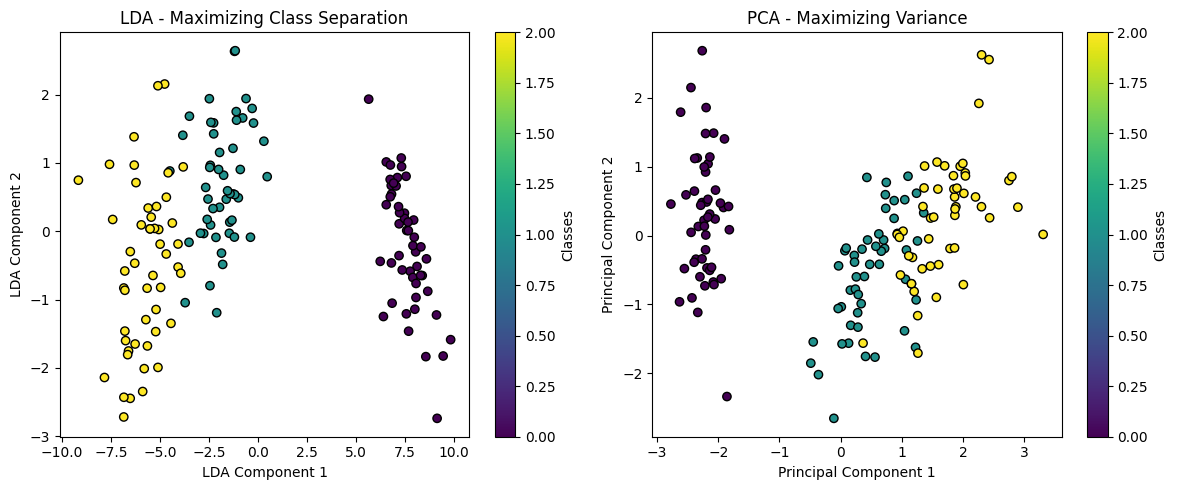


Analysis and Comparison of LDA and PCA:
- LDA aims to enhance class separability, often improving classification.
- PCA, on the other hand, is geared toward maximizing total variance, which is advantageous for feature reduction.

Interclass Distances (Between Class 0 and 1):
LDA Distance: 9.4797
PCA Distance: 2.8476


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns

def compare_lda_and_pca():
    # Step 1: Load and Standardize the Iris Data
    print("Loading and Standardizing Data")
    iris = load_iris()
    features, labels = iris.data, iris.target

    # Scale the features to have a mean of 0 and variance of 1
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    print("Data Standardized - Mean:", features_scaled.mean().round(6))
    print("Data Standardized - Std Dev:", features_scaled.std().round(6))

    # Step 2: Apply LDA to Reduce Dimensionality
    print("\nApplying Linear Discriminant Analysis (LDA)")
    lda_model = LinearDiscriminantAnalysis(n_components=2)
    features_lda = lda_model.fit_transform(features_scaled, labels)
    print("Original Data Shape:", features.shape)
    print("LDA Reduced Shape:", features_lda.shape)
    print("LDA Explained Variance:", lda_model.explained_variance_ratio_.round(4))

    # Step 3: Apply PCA to Reduce Dimensionality
    print("\nApplying Principal Component Analysis (PCA)")
    pca_model = PCA(n_components=2)
    features_pca = pca_model.fit_transform(features_scaled)
    print("PCA Explained Variance:", pca_model.explained_variance_ratio_.round(4))

    # Step 4: Visualize the LDA and PCA Results
    print("\nCreating Visualizations")
    plt.figure(figsize=(12, 5))

    # LDA Scatter Plot
    plt.subplot(1, 2, 1)
    scatter_lda = plt.scatter(features_lda[:, 0], features_lda[:, 1],
                              c=labels, cmap='viridis', edgecolor='black')
    plt.title('LDA - Maximizing Class Separation')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.colorbar(scatter_lda, label='Classes')

    # PCA Scatter Plot
    plt.subplot(1, 2, 2)
    scatter_pca = plt.scatter(features_pca[:, 0], features_pca[:, 1],
                              c=labels, cmap='viridis', edgecolor='black')
    plt.title('PCA - Maximizing Variance')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(scatter_pca, label='Classes')

    plt.tight_layout()
    plt.show()

    # Step 5: Interpretation and Comparison
    print("\nAnalysis and Comparison of LDA and PCA:")
    print("- LDA aims to enhance class separability, often improving classification.")
    print("- PCA, on the other hand, is geared toward maximizing total variance, which is advantageous for feature reduction.")

    # Calculate interclass distances for evaluation of separation
    lda_class_means = [np.mean(features_lda[labels == i], axis=0) for i in np.unique(labels)]
    pca_class_means = [np.mean(features_pca[labels == i], axis=0) for i in np.unique(labels)]

    print("\nInterclass Distances (Between Class 0 and 1):")
    print("LDA Distance:", np.linalg.norm(lda_class_means[0] - lda_class_means[1]).round(4))
    print("PCA Distance:", np.linalg.norm(pca_class_means[0] - pca_class_means[1]).round(4))

if __name__ == "__main__":
    compare_lda_and_pca()
